# **Kanada Handwritten digit Classification**

## **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
ls

 athlete_events.csv           lda_10_iter.pkl    tennis/
'BBC News Train.csv'          ML_Project_1.zip   titanic_train.csv
 Dig-MNIST.csv                MNIST/             twitter/
 groceries.csv                pokemon.csv        vgsales.csv
'groceries - groceries.csv'   project1.csv       wineQualityReds.csv
 housing.csv                  Sentiment/         wineQualityWhites.csv


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [ ]:
mnist=pd.read_csv('Dig-MNIST.csv')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=mnist['label']
y.shape

(10240,)

In [ ]:
X=mnist.iloc[:,1:]
X.shape

(10240, 784)

In [ ]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Training Models**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,shuffle=True,random_state=144,test_size=0.2)

In [ ]:
X_train.shape

(8192, 784)

In [ ]:
X_test.shape

(2048, 784)

In [ ]:
y_train.shape

(8192,)

### **Sample Images with Labels**

Label :  0


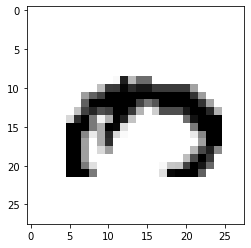

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
some_digit=np.array(X.iloc[5000])
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
print("Label : ",y.iloc[5000])

Label :  1


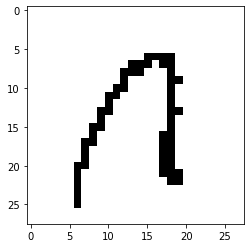

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
some_digit=np.array(X.iloc[5001])
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
print("Label : ",y.iloc[5001])

Label :  2


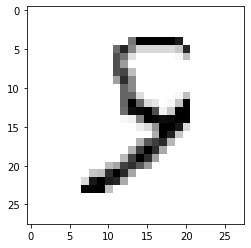

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
some_digit=np.array(X.iloc[5002])
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
print("Label : ",y.iloc[5002])

Label :  3


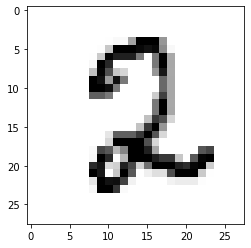

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
some_digit=np.array(X.iloc[5003])
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
print("Label : ",y.iloc[5003])

Label :  7


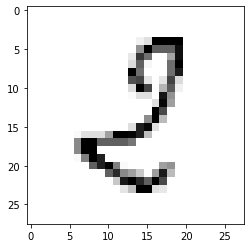

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
some_digit=np.array(X.iloc[5007])
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
print("Label : ",y.iloc[5007])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_jobs=1,n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
rf.score(X_test,y_test)

0.8427734375

In [ ]:
pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred)
print(confusion)

[[178  13   4   1   0   0   2   0   2   5]
 [ 13 176   3   4   0   3   2   1   1   1]
 [ 12   5 175   6   1   0   3   2   0   1]
 [  3   6   6 173   3   2   5   6   1   0]
 [  3   4   2   1 176   9   2   1   3   4]
 [  2   4   3   8   9 170   2   1   5   0]
 [  4   0   7   7   5   2 157  20   0   3]
 [  1   3   7   8   1   1  15 166   0   3]
 [  5   3   4   1   3   2   1   2 178   6]
 [  4   0   0   0   3   0  10   4   7 177]]


In [ ]:
from sklearn import svm
svm_model=svm.LinearSVC(C=100)
#change C=10 and C=100 to see different results
svm_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
svm_model.score(X_train,y_train)

0.8912353515625

In [ ]:
svm_model.score(X_test,y_test)

0.71533203125

In [ ]:
pred=svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred)
print(confusion)

[[163  14  11   3   1   1   1   2   7   2]
 [ 14 147   7   1   4  11   2   2  13   3]
 [  6   7 164   4   7   3   4   1   5   4]
 [ 15   6  11 146   4   3   5   8   4   3]
 [  6   2   9   6 140  14   4   1  10  13]
 [  6   9   7   4   7 150   0   1  14   6]
 [ 11   3   7  13   8   6 116  24   8   9]
 [  9  11   4  15   3   3  18 133   1   8]
 [ 11   2   4   0   7   4   1   2 161  13]
 [ 13   3   5   3  10   4   5   6  11 145]]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn import svm
svm_model=svm.LinearSVC(C=10)
#change C=10 and C=100 to see different results
svm_model.fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
svm_model.score(X_train_scaled,y_train)

0.913330078125

In [ ]:
svm_model.score(X_test_scaled,y_test)

0.724609375

In [ ]:
pred=svm_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred)
print(confusion)

[[159  12  10   3   0   0   4   1  10   6]
 [ 15 139   6   2   4   8   3   7  16   4]
 [  6   9 161   4   6   2   5   4   5   3]
 [  5   4   8 144   6   5  19   9   4   1]
 [  3   2   3   6 141  18   7   2  11  12]
 [  5   2   3   4   4 170   3   1  10   2]
 [  1   3   7  13  12   8 120  30   4   7]
 [  3  14   4   6   6   4  16 145   1   6]
 [  6   6   2   2   6   4   3   3 155  18]
 [  4   3   2   2  16   2   8   7  11 150]]


In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
model.score(X_test,y_test)

0.8427734375

In [ ]:
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred)
print(confusion)

[[177   8   5   1   1   1   5   1   5   1]
 [  8 177   6   3   1   2   0   2   3   2]
 [  7   4 176   4   0   3   4   3   2   2]
 [  2   5   3 173   1   7   8   5   1   0]
 [  0   2   1   2 169  15   7   0   6   3]
 [  1   2   1   7  10 181   0   1   1   0]
 [  4   2   3   7   5   2 159  16   0   7]
 [  2   4   4   2   0   1  24 160   1   7]
 [  4   2   5   3   2   3   2   0 174  10]
 [  4   0   1   3   1   0   8   3   5 180]]


In [ ]:
model=MLPClassifier(hidden_layer_sizes=(200,200,200,200,200,200))

In [ ]:
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 200, 200, 200, 200, 200),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [ ]:
model.score(X_test,y_test)

0.84814453125

### **Dimensionality Reduction**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

In [ ]:
def display_2d_component_names(model,selected,dataobj):
  colors=["#476A2A",'#785188','#BD3430','#4A2D4E','#875525','#A83683','#4E655E',
          '#3A3120','#535D8E']
  plt.figure(figsize=(14,14))
  plt.xlim(model[:,0].min(),model[:,0].max()+1)
  plt.ylim(model[:,1].min(),model[:,1].max()+1)
  for i in range(len(dataobj)):
    cindex=dataobj[i]%len(selected)
    if dataobj[i] not in selected:
      continue 
    plt.text(model[i,0],model[i,1],str(dataobj[i]),
             color=colors[cindex%9],fontdict={'weight':'bold','size':9})
  plt.xlabel("model feature 0")
  plt.ylabel("model feature 1")

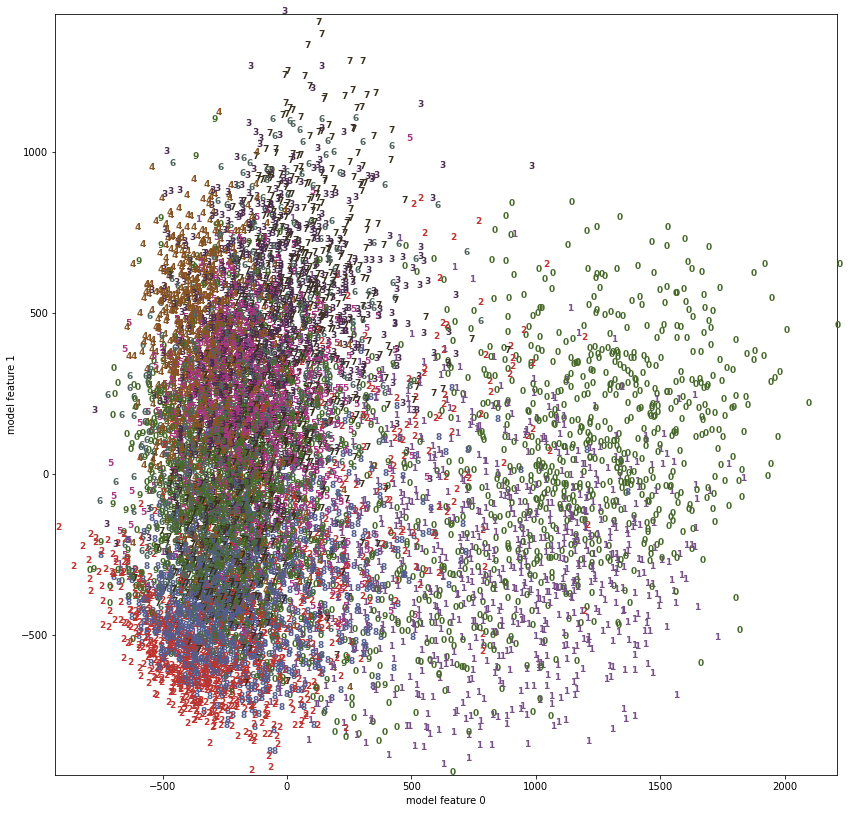

In [ ]:
pca=PCA(n_components=2)
pca.fit(X)
digits_pca=pca.transform(X)
display_2d_component_names(digits_pca,(0,1,2,3,4,5,6,7,8,9),y)

In [ ]:
tsne=TSNE(random_state=42)
digits_tsne=tsne.fit_transform(X)

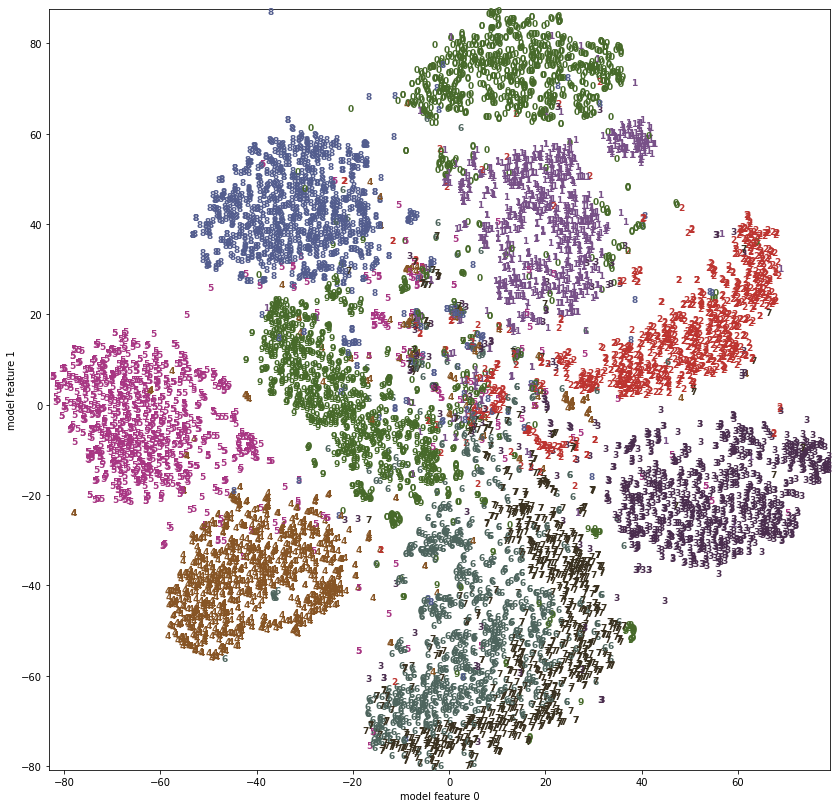

In [ ]:
display_2d_component_names(digits_tsne,(0,1,2,3,4,5,6,7,8,9),y)

In [ ]:
iso=Isomap(n_neighbors=10,n_components=2)
digits_iso=iso.fit(X).transform(X)

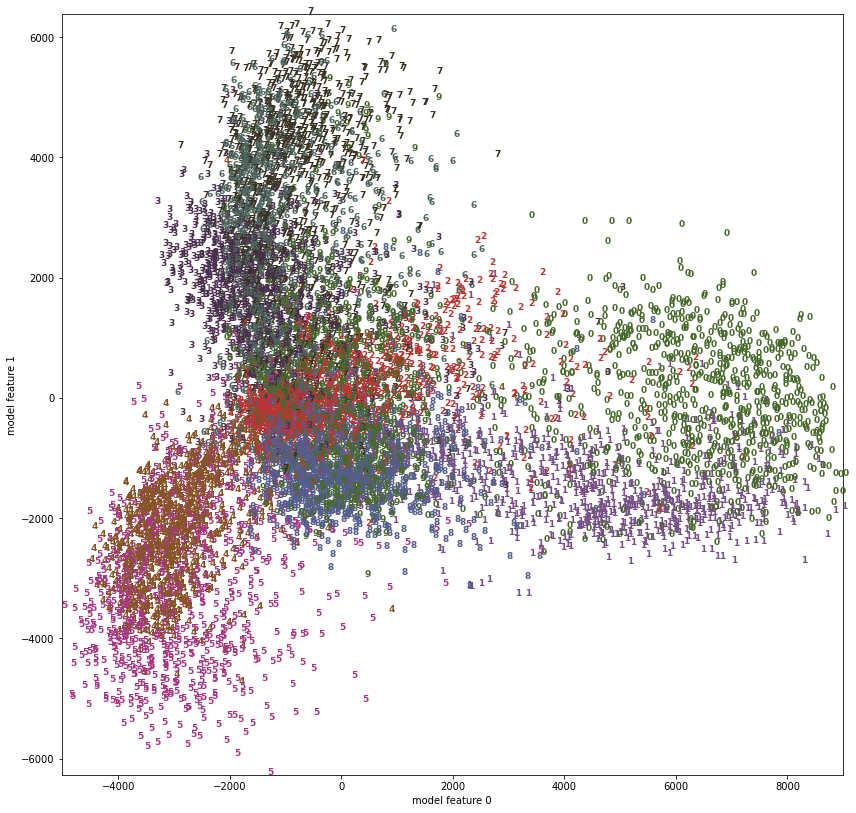

In [ ]:
display_2d_component_names(digits_iso,(0,1,2,3,4,5,6,7,8,9),y)

Out of three (PCA,Isomap,tsne),tsne seems to be best in isolating groups 

### **Support Vector Machine**

***Without scaling***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(digits_tsne,y,stratify=y,shuffle=True,random_state=144)

In [ ]:
from sklearn import svm
svm_model=svm.LinearSVC(C=100)
#change C=10 and C=100 to see different results
svm_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
svm_model.score(X_train,y_train)

0.28854166666666664

In [ ]:
svm_model.score(X_test,y_test)

0.287109375

***With scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn import svm
svm_model=svm.LinearSVC(C=10)
#change C=10 and C=100 to see different results
svm_model.fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
svm_model.score(X_train_scaled,y_train)

0.6908854166666667

In [ ]:
svm_model.score(X_test_scaled,y_test)

0.6875

### **Neural Networks**

***without scaling***

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model=MLPClassifier(hidden_layer_sizes=(200,200,200,200,200,200))

In [ ]:
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 200, 200, 200, 200, 200),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [ ]:
model.score(X_test,y_test)

0.873046875

***with scaling***

In [ ]:
model=MLPClassifier(hidden_layer_sizes=(200,200,200,200,200,200))

In [ ]:
model.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 200, 200, 200, 200, 200),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [ ]:
model.score(X_test_scaled,y_test)

0.876171875

In [ ]:
model.score(X_train_scaled,y_train)

0.9052083333333333

### **Fine Tuning Parameters for SVM**

In [ ]:
param_grid = [{'kernel': ['rbf'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
Best cross-validation score: 0.91


In [ ]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))

Test set score: 0.90


**Best parameters: {'C': 10, 'gamma': 100, 'kernel': 'rbf'}**

### **Fine Tuning Parameters for Neural Networks**

In [25]:
param_grid = [{
    'solver':['adam'],
 'alpha': [0.00001,0.0001,0.001, 0.01, 0.1],
 'activation': ['tanh','relu']}]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
grid_search = GridSearchCV(MLPClassifier(solver='adam'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))